# Import Required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load Datasets

In [2]:
billboard_data=pd.read_excel('BillBoard_Features.xls')
MSD_data=pd.read_excel('MSD_Features.xls')

In [3]:
billboard_data.shape,MSD_data.shape

((9329, 15), (5603, 18))

In [4]:
billboard_data.head(2)

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.20,0.349,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.04,0.331,0.0,0.135,0.341,145.038,231267,-5.804


In [5]:
MSD_data.head(2)

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907


#  Data pre-processing

In [6]:
MSD_data.rename(columns={0:'Artist',1:'Album',2:'Track',3:'Year',4:'TrackID',5:'SpotifyID'},inplace=True)

In [7]:
MSD_data.drop(columns=['Album','Year','TrackID',],axis=1,inplace=True)

In [8]:
billboard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             9328 non-null   object 
 1   Artist            9327 non-null   object 
 2   SpotifyID         9329 non-null   object 
 3   danceability      9329 non-null   float64
 4   energy            9329 non-null   float64
 5   key               9329 non-null   int64  
 6   mode              9329 non-null   int64  
 7   speechiness       9329 non-null   float64
 8   acousticness      9329 non-null   float64
 9   instrumentalness  9329 non-null   float64
 10  liveness          9329 non-null   float64
 11  valence           9329 non-null   float64
 12  tempo             9329 non-null   float64
 13  duration_ms       9329 non-null   int64  
 14  loudness          9329 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.1+ MB


In [9]:
MSD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            5603 non-null   object 
 1   Track             5603 non-null   object 
 2   SpotifyID         5603 non-null   object 
 3   danceability      5603 non-null   float64
 4   energy            5603 non-null   float64
 5   key               5603 non-null   int64  
 6   loudness          5603 non-null   float64
 7   mode              5603 non-null   int64  
 8   speechiness       5603 non-null   float64
 9   acousticness      5603 non-null   float64
 10  instrumentalness  5603 non-null   float64
 11  liveness          5603 non-null   float64
 12  valence           5603 non-null   float64
 13  tempo             5603 non-null   float64
 14  duration_ms       5603 non-null   int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 656.7+ KB


# Drop duplicates

In [10]:
billboard_data.drop_duplicates(subset='SpotifyID',keep=False,inplace=True)
MSD_data.drop_duplicates(subset='SpotifyID',keep=False,inplace=True)

In [11]:
billboard_data.shape,MSD_data.shape

((9258, 15), (5522, 15))

# Drop null values

In [12]:
billboard_data.dropna(inplace=True)
MSD_data.dropna(inplace=True)

# Label the data using Billboard and MSD data

In [13]:
hit=billboard_data[billboard_data['SpotifyID'].isin(billboard_data['SpotifyID'])]

In [14]:
non_hit=MSD_data[~MSD_data['SpotifyID'].isin(billboard_data['SpotifyID'])]

In [15]:
non_hit.shape,hit.shape

((5424, 15), (9256, 15))

In [16]:
hit['is_hit']=1
non_hit['is_hit']=0

#  Merge Datasets

In [17]:
df=pd.concat([hit,non_hit])

In [18]:
df.head(2)

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.20,0.349,0.0,0.340,0.218,83.903,239836,-7.230,1
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.04,0.331,0.0,0.135,0.341,145.038,231267,-5.804,1


In [19]:
df.shape

(14680, 16)

In [20]:
df.reset_index(inplace=True)

In [21]:
df.index

RangeIndex(start=0, stop=14680, step=1)

In [22]:
df.isna().sum()

index               0
Track               0
Artist              0
SpotifyID           0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
loudness            0
is_hit              0
dtype: int64

#  Drop columns

In [23]:
df.drop(['index','Track','SpotifyID'],inplace=True,axis=1)

# feature scalling

In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Artist']=lb.fit_transform(df['Artist'])

# outlier handling

In [25]:
from scipy import stats
z_score=abs(stats.zscore(df))
df=df[(z_score<3).all(axis=1)]


#  Data analysis

1    9225
0    5305
Name: is_hit, dtype: int64

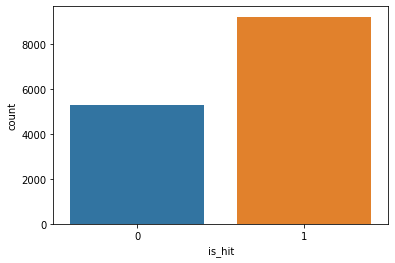

In [26]:
sns.countplot('is_hit',data=df)
df['is_hit'].value_counts()

array([[<AxesSubplot:title={'center':'Artist'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'is_hit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

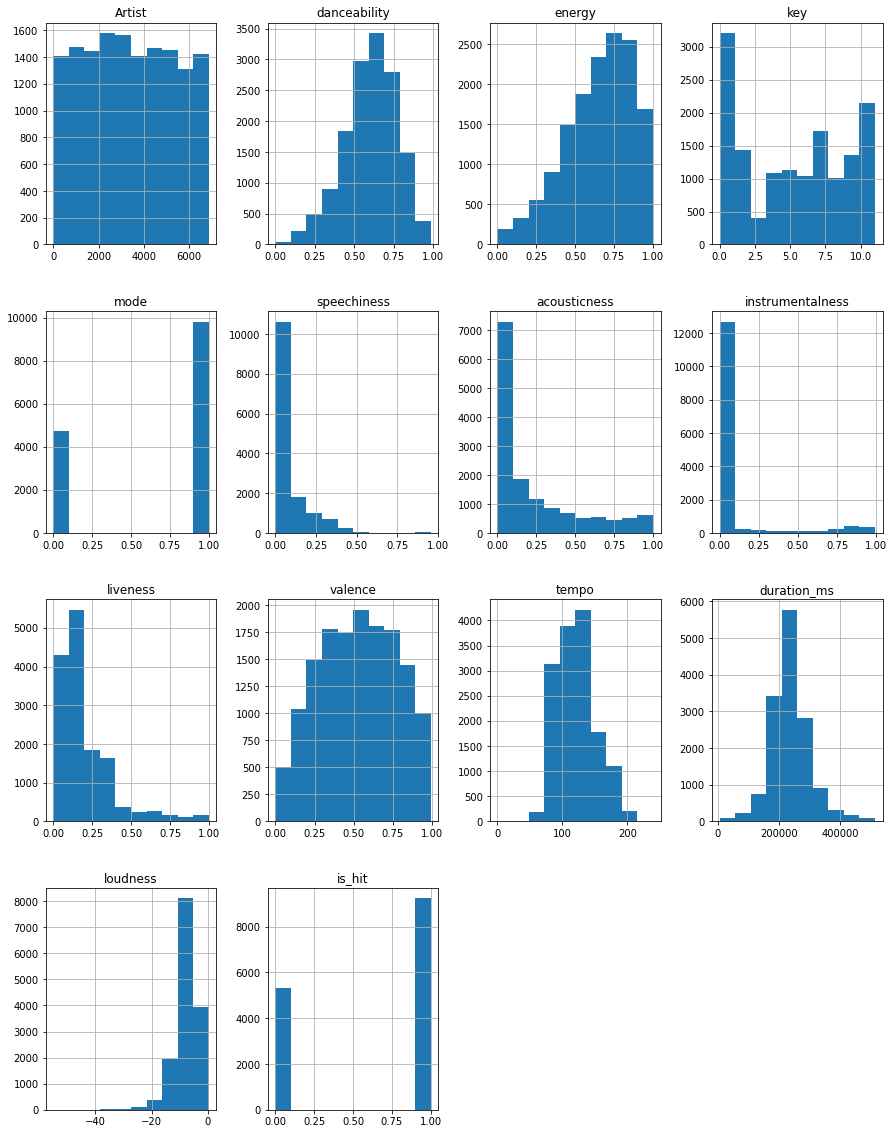

In [27]:
df.hist(figsize=(15,20))

is_hit
0    0.548439
1    0.633090
Name: danceability, dtype: float64

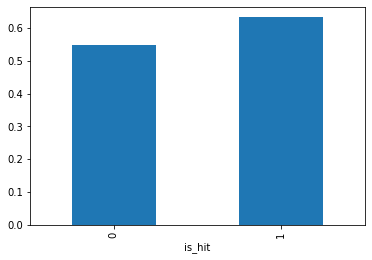

In [28]:
df.groupby('is_hit')['danceability'].mean().plot(kind='bar')
df.groupby('is_hit')['danceability'].mean()

is_hit
0    0.602483
1    0.681005
Name: energy, dtype: float64

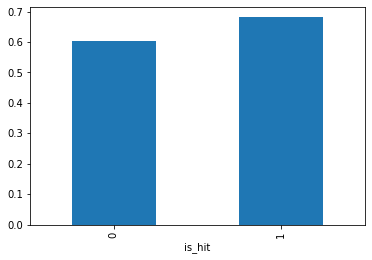

In [29]:
df.groupby('is_hit')['energy'].mean().plot(kind='bar')
df.groupby('is_hit')['energy'].mean()

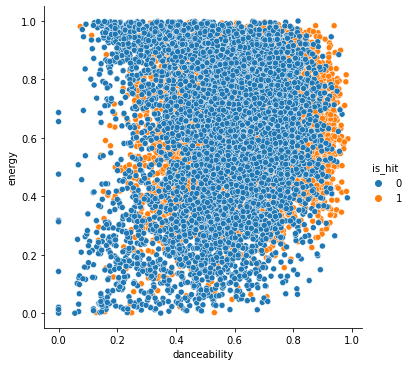

In [30]:
sns.relplot(df['danceability'],df['energy'],hue=df['is_hit'])

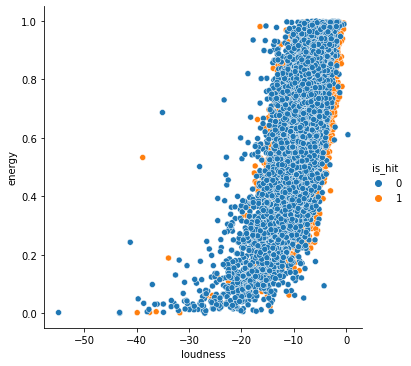

In [31]:
sns.relplot(df['loudness'],df['energy'],hue=df['is_hit'])

<AxesSubplot:xlabel='key', ylabel='tempo'>

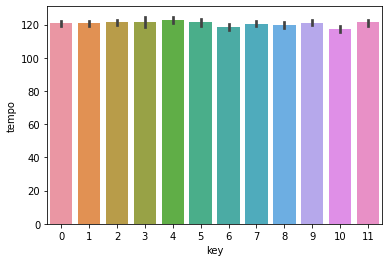

In [32]:
sns.barplot(x=df['key'],y=df['tempo'])

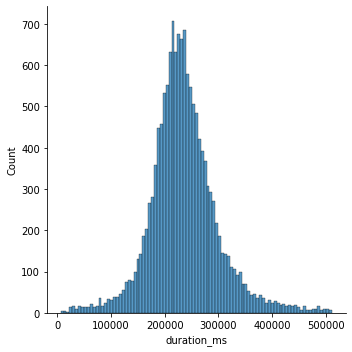

In [33]:
sns.displot(df['duration_ms'])

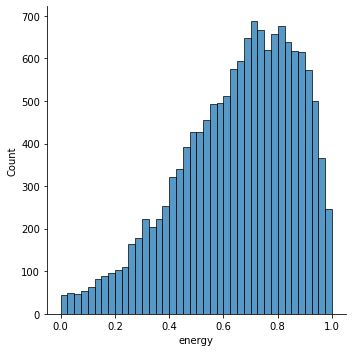

In [34]:
sns.displot(df['energy'])

# Find correlation

In [35]:
df.corr()

,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
Artist,1.000000,-0.002564,0.000196,-0.001203,0.001549,-0.025943,-0.008337,0.001620,-0.012508,0.001552,-0.001600,0.012337,-0.009155,-0.004201
danceability,-0.002564,1.000000,0.077222,0.015611,-0.109127,0.191801,-0.199502,-0.196390,-0.121245,0.465062,-0.158887,0.023578,0.144877,0.244353
energy,0.000196,0.077222,1.000000,0.033720,-0.048896,0.065856,-0.651459,-0.139537,0.148010,0.325895,0.150662,0.053670,0.706559,0.175765
key,-0.001203,0.015611,0.033720,1.000000,-0.156846,0.030842,-0.028965,-0.018998,-0.005884,0.025528,-0.015383,0.013088,0.018714,0.010669
mode,0.001549,-0.109127,-0.048896,-0.156846,1.000000,-0.101605,0.069551,-0.023173,-0.005111,-0.035349,0.031500,-0.056213,-0.022948,-0.021154
speechiness,-0.025943,0.191801,0.065856,0.030842,-0.101605,1.000000,-0.022664,-0.097178,0.181350,0.075955,-0.018670,-0.103846,0.005319,0.001138
acousticness,-0.008337,-0.199502,-0.651459,-0.028965,0.069551,-0.022664,1.000000,0.166909,-0.010166,-0.164976,-0.119589,-0.159276,-0.518559,-0.295496
instrumentalness,0.001620,-0.196390,-0.139537,-0.018998,-0.023173,-0.097178,0.166909,1.000000,-0.020319,-0.157557,-0.005344,0.058665,-0.364503,-0.363747
liveness,-0.012508,-0.121245,0.148010,-0.005884,-0.005111,0.181350,-0.010166,-0.020319,1.000000,-0.001832,0.010182,-0.026004,0.040476,-0.096517
valence,0.001552,0.465062,0.325895,0.025528,-0.035349,0.075955,-0.164976,-0.157557,-0.001832,1.000000,0.023760,-0.123617,0.183013,0.016368


<AxesSubplot:>

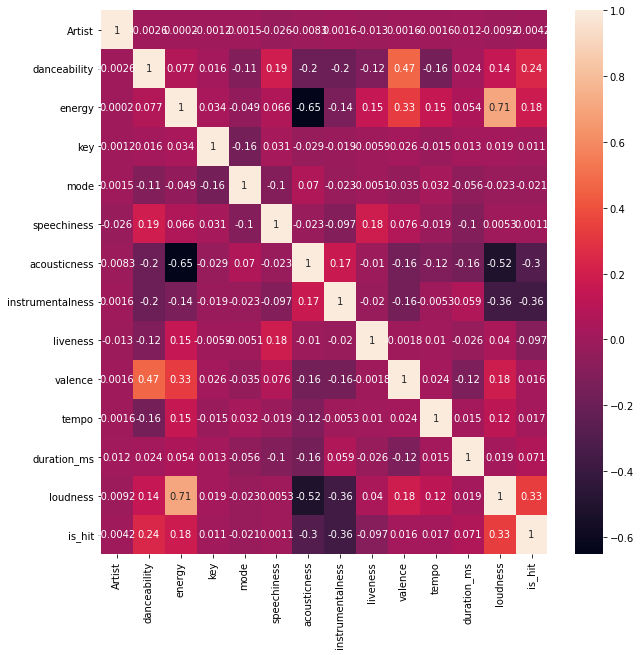

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# create feature and target variables

In [37]:
x=df.drop('is_hit',axis=1)
y=df.is_hit

In [38]:
x.shape,y.shape

((14530, 13), (14530,))

# split data into train and test

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((11624, 13), (11624,), (2906, 13), (2906,))

# Apply algorithms

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [42]:
models=[LogisticRegression,
        DecisionTreeClassifier,RandomForestClassifier,SVC,GaussianNB,
        GradientBoostingClassifier,XGBClassifier,AdaBoostClassifier]

In [43]:
for model in models:
    m1=model()
    m1.fit(x_train,y_train)
    print(m1, ': accuracy: ',m1.score(x_test,y_test))

LogisticRegression() : accuracy:  0.6445285615966965
DecisionTreeClassifier() : accuracy:  0.7140399174122505
RandomForestClassifier() : accuracy:  0.7983482450103234
SVC() : accuracy:  0.6937370956641431
GaussianNB() : accuracy:  0.73331039229181
GradientBoostingClassifier() : accuracy:  0.8011011699931176
[13:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators

# apply RandomforestClassifier algorithm

In [44]:
model=RandomForestClassifier()

In [45]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
model.score(x_test,y_test)

0.8007570543702685

In [47]:
from sklearn.model_selection import KFold,cross_val_score

In [48]:
kfold = KFold(n_splits=10)
cv_result =cross_val_score(model,x_train,y_train,cv=kfold)

In [49]:
cv_result

array([0.79965606, 0.77730009, 0.79535684, 0.80051591, 0.79432014,
       0.79259897, 0.78313253, 0.81067126, 0.81239243, 0.80034423])

In [50]:
y_pred=model.predict(x_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.61      0.69      1034
           1       0.81      0.90      0.85      1872

    accuracy                           0.80      2906
   macro avg       0.79      0.76      0.77      2906
weighted avg       0.80      0.80      0.79      2906



#  save model

In [53]:
import pickle
file=open('billboard hot100.pkl','wb')

pickle.dump(model,file)